In [1]:
from matplotlib import pyplot as plt
import numpy as np

from covid19_model.models.pymodels import sir

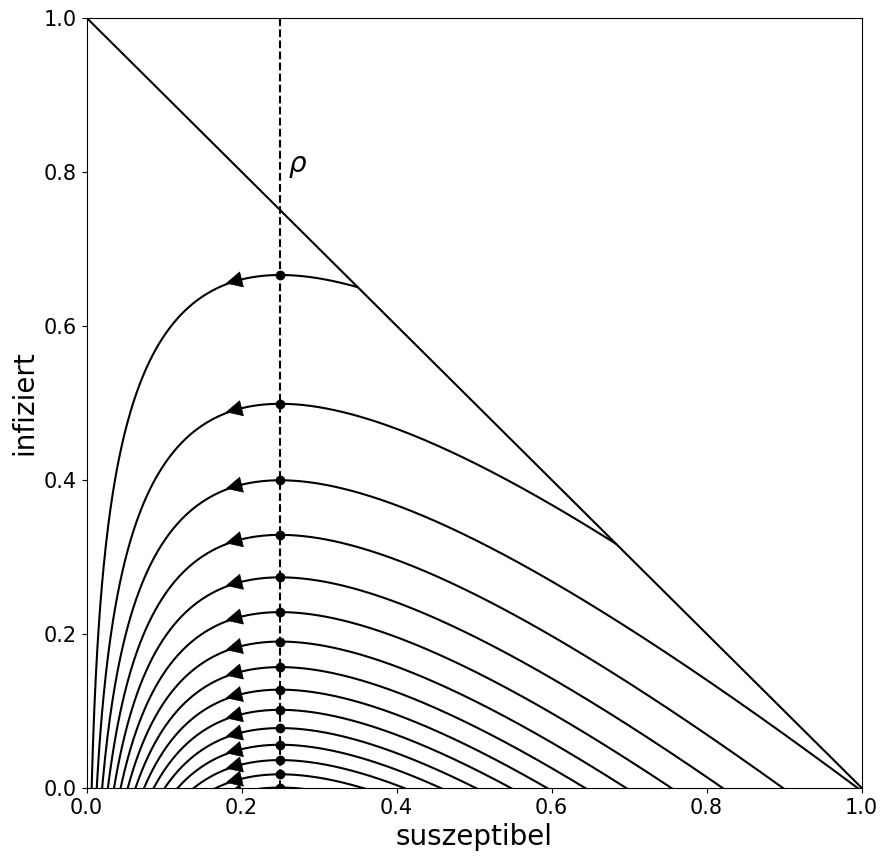

In [2]:
class phase_portrait:
    def __init__(self, beta, gamma, n): # n = point density
        self.beta = beta
        self.gamma = gamma
        self.rho = self.gamma / self.beta
        self.n = n
        self.fig, (self.ax) = plt.subplots(1, 1, figsize=(10,10))

    def get_trajectory(self, x0):
        s0, i0 = x0
        rho = self.rho
        c = i0 + s0 - rho * np.log(s0)
        s = np.arange(1/self.n, s0, 1/self.n)
        i = -s + rho * np.log(s) + c
        imax = 1 - rho + rho * np.log(rho/s0)
        return s, i, imax
    
    def draw_trajectory(self, x0, arrow_aim):
        s, i, imax = self.get_trajectory(x0)
        self.ax.plot(s, i, 'k-') # trajectory
        self.ax.scatter(self.rho, imax, color='k') # marker for imax
        n = int((s[-1]*self.n) * (arrow_aim / s[-1])) # start-index for arrow at position s = arrow_aim
        self.ax.arrow(s[n], i[n], s[n-1]-s[n], i[n-1]-i[n], head_width=0.02, head_length=0.02, color='k', linewidth=0.5) # direction (head is one smaller because we move from 1 to 0 in s direction)
        return False if imax > 0 else True # stop drawing new trajectories
        

    def draw(self):
        self.ax.set_xlabel('suszeptibel', fontsize=20)
        self.ax.set_ylabel('infiziert', fontsize=20)
        self.ax.tick_params(axis='both', labelsize=15)
        self.ax.set_xlim(0,1)
        self.ax.set_ylim(0,1)
        x = np.linspace(0,1)
        y = np.array([-i+1 for i in x])
        rho = self.rho
        arrow_aim = rho - 0.05 # value on s_axis to start arrow
        i_start = rho + 0.1 # i0 of first trajectory
        self.ax.plot(x,y, 'k-') # diagonal N0 line
        self.ax.plot([rho,rho], [0,1], 'k--') # threshold
        self.ax.text(rho+0.01, 0.8, r"$\rho$", fontsize=20)

        c = 0
        while True:
            n = c/3 + i_start
            x0 = (n, 1-n)
            stop = self.draw_trajectory(x0, arrow_aim)
            if stop: break
            c += 1
        # plt.savefig('phase_portrait.pdf')
        plt.show()

phase_portrait(2, 0.5, 1000).draw()

/var/folders/75/jrzx9lpx6yx2jrptq__7tk2w0000gn/T/ipykernel_21031/971500353.py:18: RuntimeWarning: invalid value encountered in divide
  ds = ds / length
/var/folders/75/jrzx9lpx6yx2jrptq__7tk2w0000gn/T/ipykernel_21031/971500353.py:19: RuntimeWarning: invalid value encountered in divide
  di = di / length


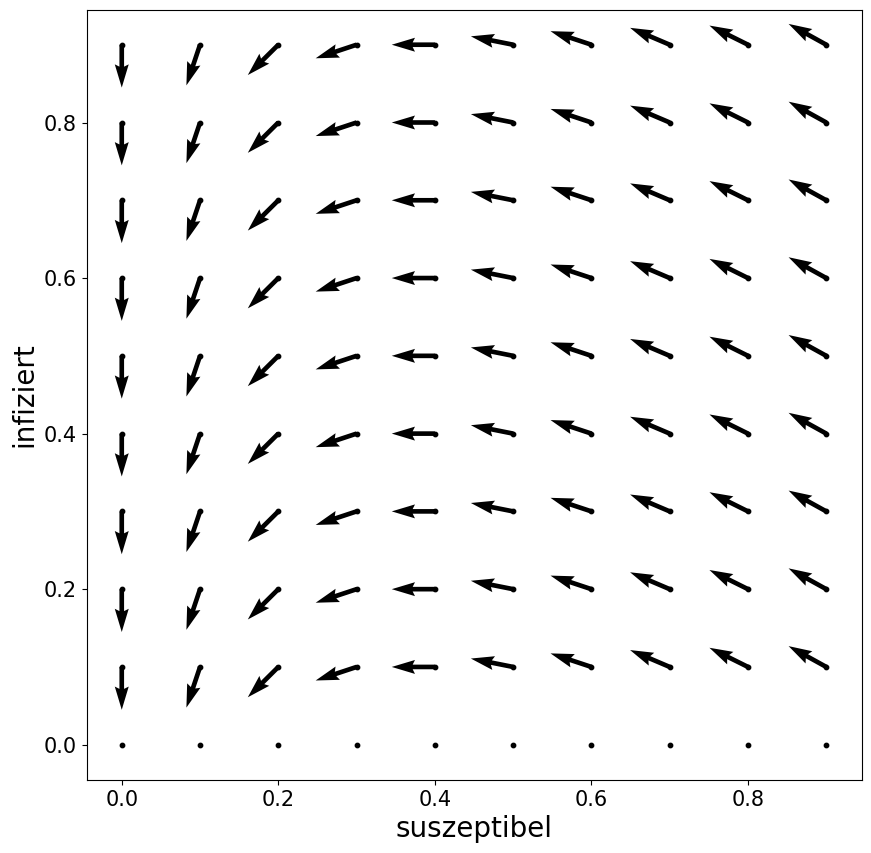

In [11]:
xmin, xmax = 0, 1
ymin, ymax = 0, 1

t = 0
beta, gamma = 0.5, 0.2

step = 0.1

x = np.arange(xmin, xmax, step)
y = np.arange(ymin, ymax, step)

s,i = np.meshgrid(x,y)

[ds, di, dr] = sir([s, i, None], t, beta, gamma)

length = np.hypot(ds,di)

ds = ds / length
di = di / length


fig, ax = plt.subplots(figsize=((xmax-xmin)*10, (ymax-ymin)*10))
ax.set_xlabel('suszeptibel', fontsize=20)
ax.set_ylabel('infiziert', fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.scatter(s, i, s=10, color='k')
ax.quiver(s, i, ds, di, units='xy', angles='xy', scale_units='xy')
# plt.savefig('slope_field.pdf')
plt.show()